
# TEXT CLASSIFICATION

In [1]:
#import
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
import seaborn as sns
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ntorj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
hull = pd.read_csv("hull.csv")
X,y = hull.research, hull.department

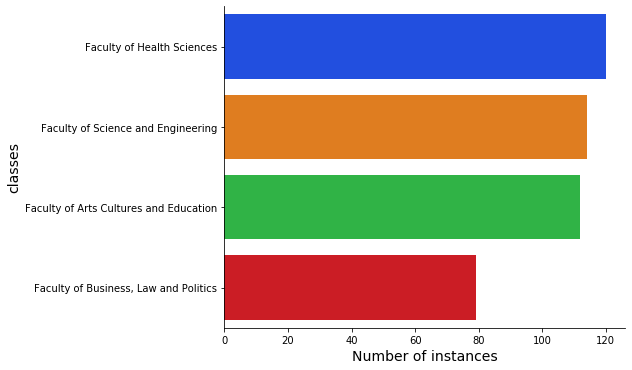

In [3]:
g = sns.catplot(y="department", kind="count", palette='bright', data=hull)
g.fig.set_size_inches(16, 5)

g.set_xlabels('Number of instances', fontsize=14)
g.set_ylabels('classes', fontsize=14)

In [4]:
hull['department'].value_counts()

Faculty of Health Sciences                120
Faculty of Science and Engineering        114
Faculty of Arts Cultures and Education    112
Faculty of Business, Law and Politics      79
Name: department, dtype: int64

In [5]:
len(hull.department)

425

In [6]:
documents = []
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[16  0  2  1]
 [ 1 12  0  2]
 [ 3  0 21  0]
 [ 4  0  3 20]]
                                        precision    recall  f1-score   support

Faculty of Arts Cultures and Education       0.67      0.84      0.74        19
 Faculty of Business, Law and Politics       1.00      0.80      0.89        15
            Faculty of Health Sciences       0.81      0.88      0.84        24
    Faculty of Science and Engineering       0.87      0.74      0.80        27

                              accuracy                           0.81        85
                             macro avg       0.84      0.81      0.82        85
                          weighted avg       0.83      0.81      0.81        85

0.8117647058823529


In [13]:
dump(vectorizer, "preprocessor.joblib")
dump(model, "classifier.joblib")

['classifier.joblib']

In [14]:
preprocessor = load("preprocessor.joblib")
model = load("classifier.joblib")

def predict_topic():
  text = input("Enter text to be predicted: ")
  text = preprocessor.transform([text])
  prediction = model.predict(text)[0]
  print("This area is most likely to be in {}." .format(prediction))

In [ ]:
predict_topic()